# Take Home Challenge-1: Ultimate Challenge

## Part 1-EDA-Exploratory Data Analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import libraries
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

### Read Data 

In [2]:
#check logins
logins = pd.read_json('logins.json')
logins.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
print(min(logins.login_time)) #first time login

1970-01-01 20:12:16


In [6]:
print(max(logins.login_time)) #last time login

1970-04-13 18:57:38


In [7]:
type(logins['login_time'][0]) #check type

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
#using a timedelta of 15 min, count how many logins fall in that time period. create new series of counts versus periods.
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng) #creat a new series with all zeros, index with rng
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [7]:
logins = logins.sort_values('login_time') # sort the login time.
logins = logins.reset_index(drop=True)
logins.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [8]:
#count login time in time range created
n = 0 
for i in range(len(logins)):
    s = ts.index[n] #start time
    e = ts.index[n+1] #end time
    t = logins['login_time'][i] #login time
    if s < t < e:
        ts[n] = ts[n] + 1
    else:
        while t > e:
            n = n + 1
            s = ts.index[n] #change start time to next slot
            e = ts.index[n+1] #change end time to next slot
        ts[n] = ts[n] + 1

In [9]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

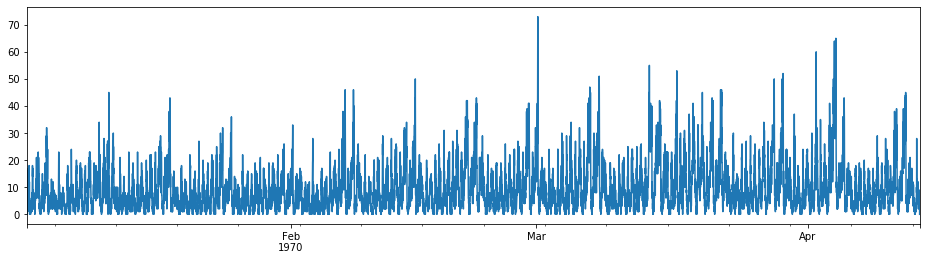

In [10]:
plt.figure(figsize=(16,4)) # The entire data set
ts.plot()

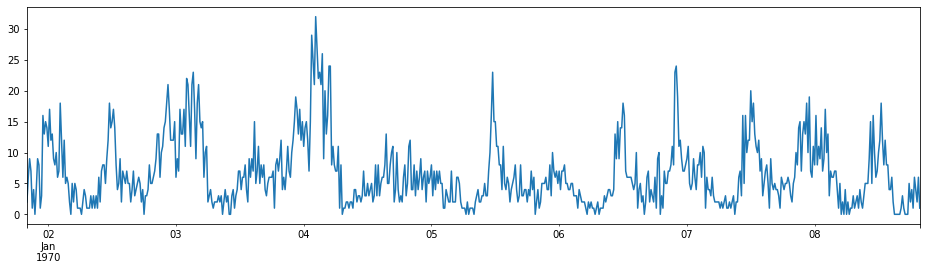

In [11]:
plt.figure(figsize=(16,4)) #first week look
ts[0:672].plot()

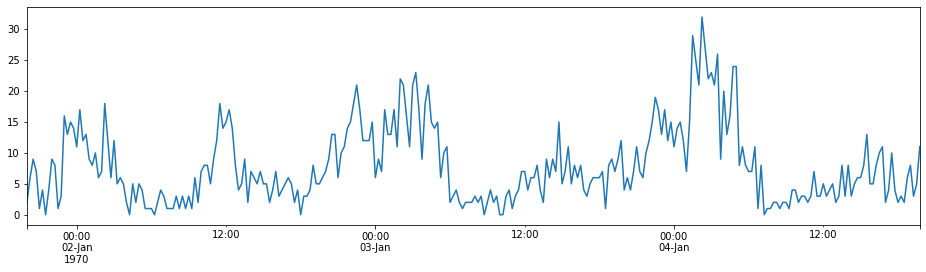

In [14]:
plt.figure(figsize=(16,4)) #first three days look
ts[0:288].plot()

Observation:
1. The login data shows the earliest login was 1970-01-01 20:12:16, and the latest login was 1970-04-13 18:57:38; 
2. The login peaks display every 12 hours: midnight and noon from the first three day and the first month login record.

## Part 2-Experiment and Metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A: I will choose weekday_pct to see if decrease which indicates the drive is active on weekends, since both cities have an active half day, there is no reason for the drive to cross the bridge. Even the Ultimate managers try to encourage drivers to be active in both cities, drivers will be more likely to take advantages of this experiment during weekends.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

A: I will set up an initial day and collect drivers' habits during that week as control sample; The collect the later on records to compared with control sample.

b. what statistical test(s) you will conduct to verify the significance of the
observation

A: I would compute the effective size, such as Pearson's correlation to indicate the linear relation to verify the significance of the observation.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

A: In the meatime, I would also compute the cost and profit of this policy. If cost is outweighted the profit, I would recommend city operations team to suspend this policy，on the contrary, I would recommend to make this policy permenant.

## Part 3-Predictive Modeling 

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


In [12]:
#check ultimate_data_challenge
udc = pd.read_json('ultimate_data_challenge.json')
udc.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0


In [5]:
udc.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,41878.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,49799.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.617338,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.446652
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.300000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


In [13]:
udc.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

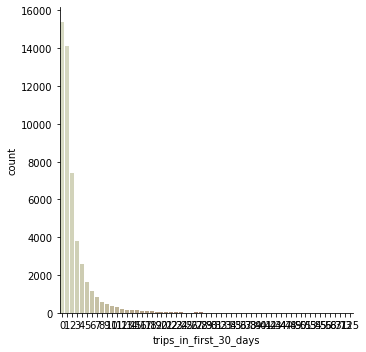

In [15]:
sns.catplot(x="trips_in_first_30_days", kind="count", palette="ch:.5", data=udc)

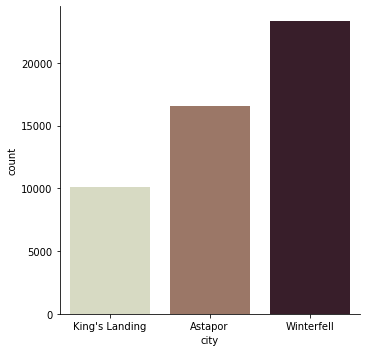

In [8]:
sns.catplot(x="city", kind="count", palette="ch:.5", data=udc)

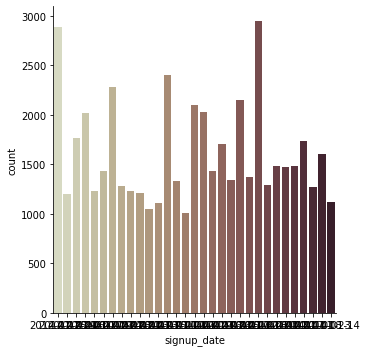

In [39]:
sns.catplot(x="signup_date", kind="count", palette="ch:.5", data=udc)

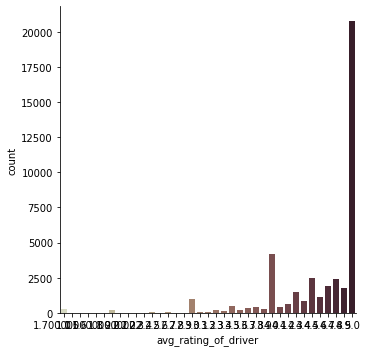

In [17]:
sns.catplot(x="avg_rating_of_driver", kind="count", palette="ch:.5", data=udc)

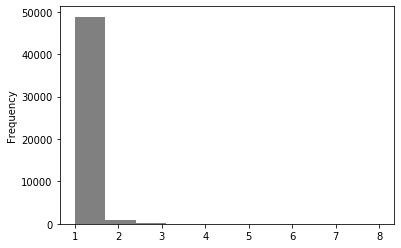

In [28]:
udc['avg_surge'].plot.hist(color='grey');

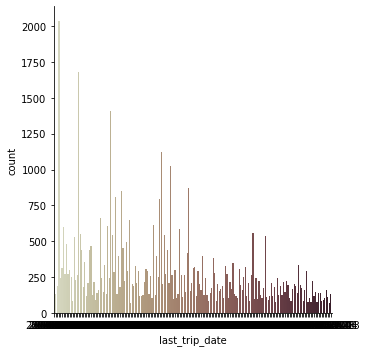

In [29]:
sns.catplot(x="last_trip_date", kind="count", palette="ch:.5", data=udc)

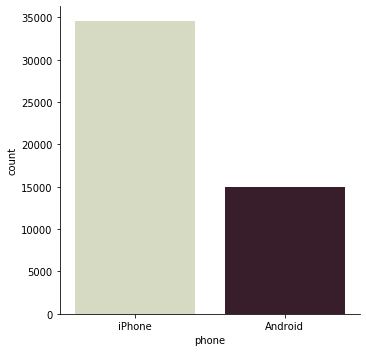

In [30]:
sns.catplot(x="phone", kind="count", palette="ch:.5", data=udc)

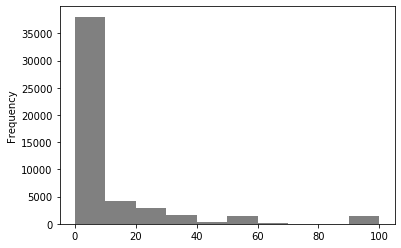

In [32]:
udc['surge_pct'].plot.hist(color='grey');

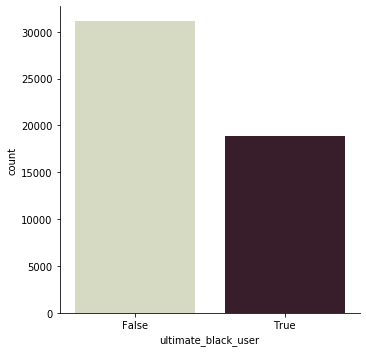

In [33]:
sns.catplot(x="ultimate_black_user", kind="count", palette="ch:.5", data=udc)

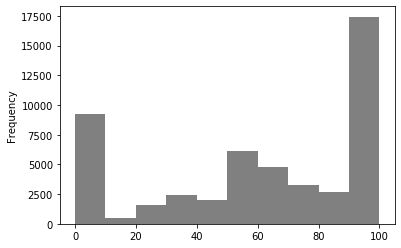

In [35]:
udc['weekday_pct'].plot.hist(color='grey');

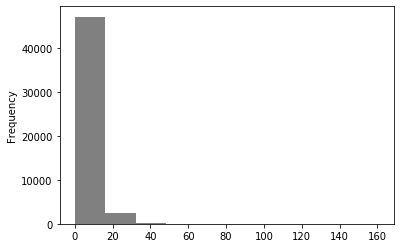

In [37]:
udc['avg_dist'].plot.hist(color='grey');

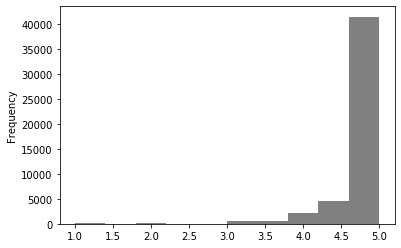

In [38]:
udc['avg_rating_by_driver'].plot.hist(color='grey');

In [14]:
#check missing data
print(udc.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [15]:
#filling missing data
x = ['avg_rating_of_driver','avg_rating_by_driver']

for i in x:
    udc.loc[udc[i].isnull(),i] = udc[i].fillna(udc[i].mean())
    
y = ['phone']

for i in y:
    udc.loc[udc[i].isnull(),i] = udc[i].fillna(udc[i].mode()[0])

## Handling Categorical Features 

In [16]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
udc_cats = _get_categorical_features(udc)


# create additional dummy features
udc = _get_dummies(udc, udc_cats) 

In [17]:
#After encoding, drop categorical columns
udc_cat = udc.select_dtypes(include=[object])
udc = udc.drop(udc_cat,axis=1)
udc.head(3)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,...,last_trip_date_2014-06-24,last_trip_date_2014-06-25,last_trip_date_2014-06-26,last_trip_date_2014-06-27,last_trip_date_2014-06-28,last_trip_date_2014-06-29,last_trip_date_2014-06-30,last_trip_date_2014-07-01,phone_Android,phone_iPhone
0,4,4.7,1.1,15.4,True,46.2,3.67,5.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,5.0,1.0,0.0,False,50.0,8.26,5.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4.3,1.0,0.0,False,100.0,0.77,5.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
#Prepare targe column
for i in range(len(udc.trips_in_first_30_days)):
    if udc.trips_in_first_30_days[i] > 0:
        udc.trips_in_first_30_days[i] = 1 
    else:
        udc.trips_in_first_30_days[i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#Split dataset into train and test
y = udc.trips_in_first_30_days
y.head()

0    1
1    0
2    1
3    1
4    1
Name: trips_in_first_30_days, dtype: int64

In [21]:
#set up dependent Variables
X = udc.drop(['trips_in_first_30_days'], axis=1)
X.head(3)

,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,...,last_trip_date_2014-06-24,last_trip_date_2014-06-25,last_trip_date_2014-06-26,last_trip_date_2014-06-27,last_trip_date_2014-06-28,last_trip_date_2014-06-29,last_trip_date_2014-06-30,last_trip_date_2014-07-01,phone_Android,phone_iPhone
0,4.7,1.1,15.4,True,46.2,3.67,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,1.0,0.0,False,50.0,8.26,5.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,1.0,0.0,False,100.0,0.77,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
#split app_train into 70% train and 30% test parts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Calculate IV score for each column 

In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string


max_bin = 20
force_bin = 3

#For some numeric variables, the mono_bin function produce only one category while binning. 
#To avoid that, ‘force_bin’ to ensure it at least produces 2 categories.

# define a binning function
def mono_bin(Y, X, n = max_bin): #mono_bin for numeric variables
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X): #char_bin for character variables
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [24]:
final_iv, IV = data_vars(X_train, y_train)

In [25]:
IV

,VAR_NAME,IV
0,avg_dist,0.006767
1,avg_rating_by_driver,0.001736
2,avg_rating_of_driver,0.000127
3,avg_surge,0.122809
4,city_Astapor,0.002664
...,...,...
220,signup_date_2014-01-30,0.000166
221,signup_date_2014-01-31,0.001841
222,surge_pct,0.122724
223,ultimate_black_user,0.007883


In [26]:
IV_selected = IV[(IV['IV']>0.01) & (IV['IV']<0.8)]
IV_selected

,VAR_NAME,IV
3,avg_surge,0.122809
6,city_Winterfell,0.016241
38,last_trip_date_2014-02-01,0.064996
39,last_trip_date_2014-02-02,0.023916
40,last_trip_date_2014-02-03,0.010705
81,last_trip_date_2014-03-16,0.015081
95,last_trip_date_2014-03-30,0.010206
102,last_trip_date_2014-04-06,0.011081
191,signup_date_2014-01-01,0.014396
222,surge_pct,0.122724


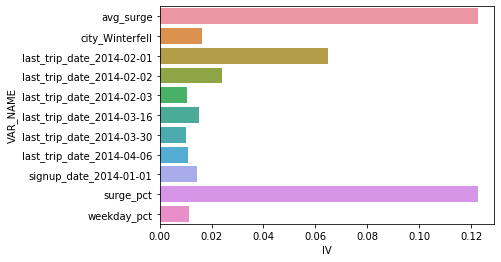

In [27]:
sns.barplot(x="IV", y="VAR_NAME", data=IV_selected)

## Explore Selected Columns

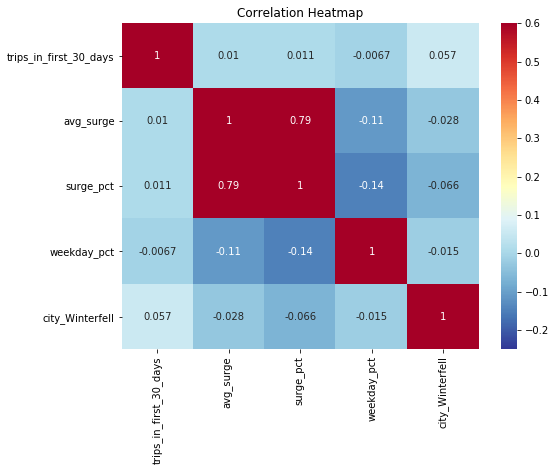

In [31]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = udc[['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct','city_Winterfell']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

The weekday_pct variables show most negative values, which indicates the high percentage of weekday users are tend to be retentional.

## Model Evaluation 

In [20]:
# Import the model we are using
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=200,
                            random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.7531502151351251

## Conclusion 

I utilized numerical and categorical variables to bulid a model to predict active users. My model's accuracy is approximately 75.3% of predictions. According to the feature importance, the average surge multiplier over all of this user's trip and percent of trips taken with surge multiplier is very important metrics for a retentional user. I will suggest focus on the habit of using surge multiplier and the users preferring surge multiplier during their trips. Besides, sign-up city of Winterfell is the area should be paid attention to. The users with high percent of trips during weekdays are another group tend to be retentional users.